## Project 4
### Loan Prediciton and Association based on Income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

#### Pre-Processing the Data

In [11]:
df = pd.read_csv("/Users/joshuahernandez8/Desktop/ITCS 3162/Project 4/clustering.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


### Initial Data Understanding

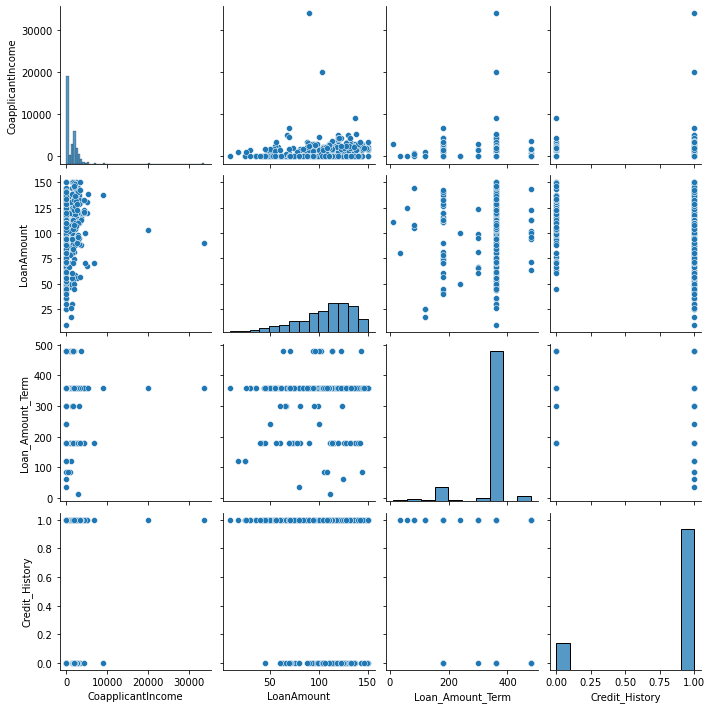

In [7]:
sns.pairplot(df.drop(['ApplicantIncome'], axis=1))

#### Our first step will be to change our categorical variables into integer data types

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in df.columns:
    df[col] = enc.fit(df[col]).transform(df[col])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

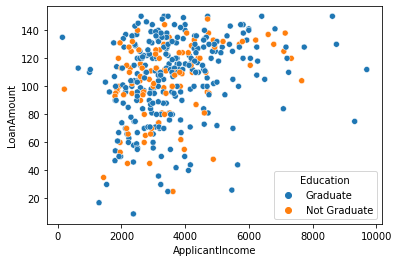

In [12]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Education', data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

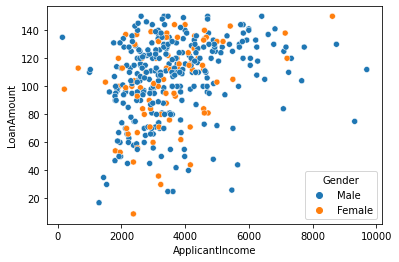

In [13]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Gender', data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

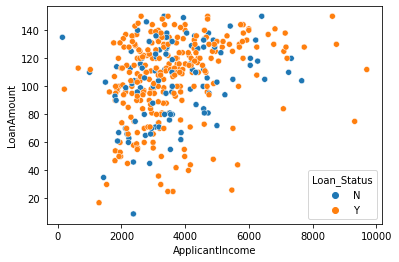

In [14]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)

<AxesSubplot:>

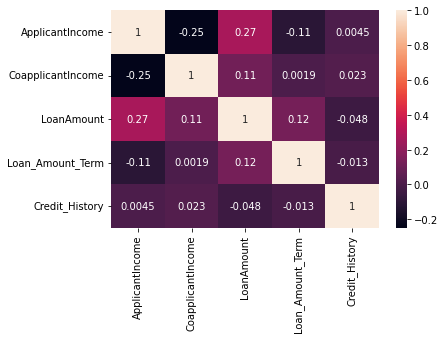

In [15]:
sns.heatmap(df.corr(), annot=True)

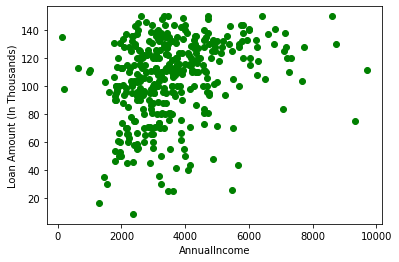

In [18]:
X = df[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='green')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

#### K-Means Clustering

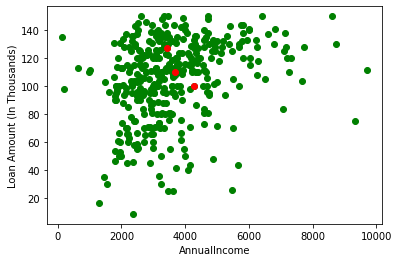

In [20]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='green')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [21]:
# Assigning points for the closest cluster centroid
#Compute the centroids for new clusters


diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/var/folders/xx/z33xb8_d4lj3wb0rcw4749mm0000gn/T/ipykernel_23002/3485414895.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/var/folders/xx/z33xb8_d4lj3wb0rcw4749mm0000gn/T/ipykernel_23002/3485414895.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


247.3494993033782
306.7285526617601
256.2977720202419
195.48973153596262
69.5956789047341
80.42253001270922
99.50821192263949
27.38200063816943
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


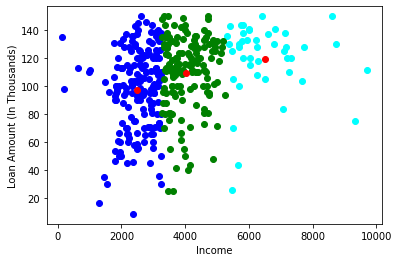

In [23]:
color=['blue','cyan','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

### Results

#### Here it clear to see the three clusters designated by the Applicant Income. The red dots are designated as the centroid as each respective cluster. The effort of this project, research, and results are to have clusters, k, represent, low income, median income, and high income applicants and the effect of authroized loan amounts. 